**Submission Report**

The selected dataset was the Titanic dataset. 
I was mostly concerned about the survived rate for some particular points of view. 
I did some analyzing on the data, created some age groups so I could work better with the ages and experimented some charts and plots.
I need to remove some null values from ages.
Here is the report:

***TITANIC REPORT***

The Titanic was a ship that no sea could sink. Although no one expected the ship would sink on the first ever travel to the new world, it did. But the main point here is, why so many people died at that day? 
we know, for sure, that Titanic didn't have a board enough life boats to save everyone. But it could have been saved a lot more people. 
We are here to try to understand three main questions.

1. How likely a person was to survive being in the 1st class?
2. Who would have more chances to survive, women or man?
3. Do children were more likely to be saved?

In [96]:
titanic_file = '/Users/thramosal/Documents/PROJETOS/PERSONAL_PROJECTS/DATA_ANALYSIS_NANODEGREE/data_analysis/titanic_data.csv'

def read_csv(file):
    with open(file, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

titanic_data = read_csv(titanic_file)
print(titanic_data[0])

OrderedDict([('PassengerId', '1'), ('Survived', '0'), ('Pclass', '3'), ('Name', 'Braund, Mr. Owen Harris'), ('Sex', 'male'), ('Age', '22'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', 'A/5 21171'), ('Fare', '7.25'), ('Cabin', ''), ('Embarked', 'S')])


In [97]:
import pandas as pd

titanic_df = pd.read_csv(titanic_file)

In [98]:
survived_df = titanic_df[titanic_df['Survived'].isin([1])].copy()

In [99]:
ex_null_age = titanic_df[titanic_df['Age'].notnull()].copy()
def cutDF(df):
    return pd.cut(df,[0, 13, 18, 25, 40, 50, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'lower_middle', 'upper_middle', 'OAP'])

ex_null_age['Age_Category'] = ex_null_age[['Age']].apply(cutDF)

In [100]:
def percentage_survived(p_class):    
    p_class_frame = titanic_df[titanic_df['Pclass'].isin([p_class])]
    total_class = len(p_class_frame)
    total_survived = p_class_frame.agg({'Survived': 'sum'})
    return (total_survived / total_class) * 100

***Question 1: How likely a person was to survive being in the 1st class?***

For the first question we can answer that being in the 1st class would give you a 62% of chances to survive.

In [101]:
print('Rate for 1st class {}'.format(percentage_survived(1)))
print('Rate for 2nd class {}'.format(percentage_survived(2)))
print('Rate for 3th class {}'.format(percentage_survived(3)))

Rate for 1st class Survived    62.962963
dtype: float64
Rate for 2nd class Survived    47.282609
dtype: float64
Rate for 3th class Survived    24.236253
dtype: float64


***Who would have more chances to survive, women or man?***

For the second question, it's clear looking at the graphs below that being a woman would be more likely to survive than a man, but being a woman on the 3th class drastically dropped the survival rate.

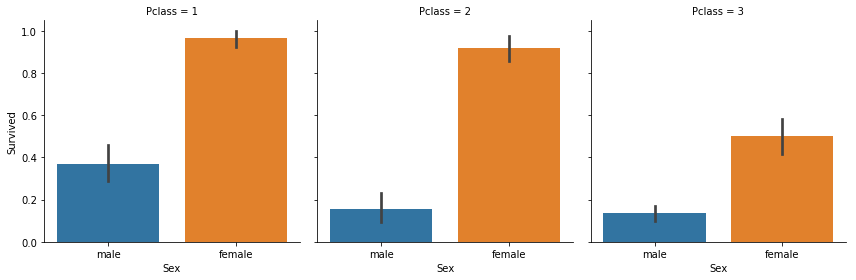

In [102]:
%matplotlib inline
import seaborn as sns
sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_df , kind="bar")

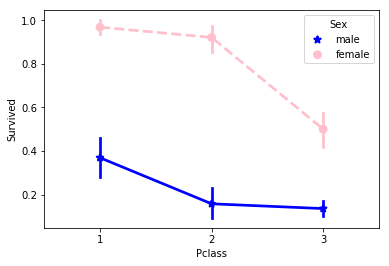

In [103]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

***Do children were more likely to be saved?***

For the third question, yes. Children were more likely to be saved even if the children were in the 3th class the survival rate were a lot higher than other ages. But even then, third class passengers were clearly left to die.

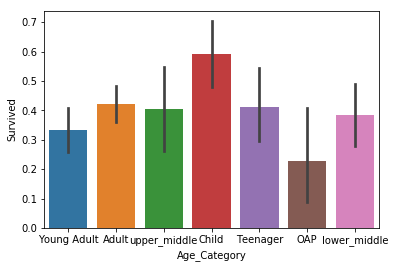

In [104]:
sns.barplot(data=ex_null_age, x= 'Age_Category', y='Survived')

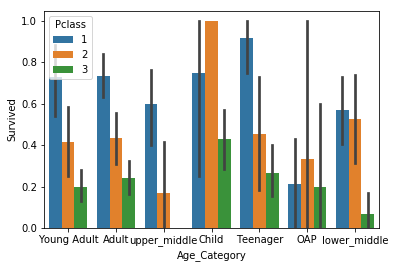

In [105]:
sns.barplot(data=ex_null_age, x= 'Age_Category', y='Survived', hue='Pclass')